In [1]:
using HTTP
using JSON
using DataFrames
using Dates
using TimeSeries

In [2]:
include("../env.jl")

"VVp9vMTjNvSEUqJJuqpRLw5r4oUq2uFGbX2VipCE"

In [3]:
function wgetStock(sym::String)
    fromTime =  Dates.format(now()-Day(500), "yyyy-mm-ddTHH:MM:SS")
    @show fromTime
    headers = ["APCA-API-KEY-ID" => ENV["APCA-API-KEY-ID"], "APCA-API-SECRET-KEY" => ENV["APCA-API-SECRET-KEY"] ]
    url_query = "https://data.alpaca.markets/v1/bars/day?symbols="*sym*"&after="*fromTime*"&limit=500"
    raw_response = HTTP.request("GET", url_query, headers)
    rsp = JSON.parse(String(raw_response.body))
    df2 = DataFrame(t = Int[],h = Float32[],l = Float32[],o = Float32[],c = Float32[],v = Float32[] )
    for (sym,v) in rsp
        for q in v
            push!(df2,q)
        end
    end
    transform!(df2, :t => ( x -> Dates.unix2datetime.(x) ) => :ondate)
    DataFrames.rename!(df2,:h => :High)
    DataFrames.rename!(df2,:l => :Low)
    DataFrames.rename!(df2,:o => :Open)
    DataFrames.rename!(df2,:c => :Close)
    DataFrames.rename!(df2,:v => :Volume)
    sort!(df2,order(:ondate))
    return select(df2,[:Open,:Close,:High,:Low,:Volume,:ondate])
end

wgetStock (generic function with 1 method)

In [4]:
tick1="GLD"
df1 = wgetStock(tick1)
tick2="IAU"
df2 = wgetStock(tick2)

fromTime = "2020-02-03T18:57:48"
fromTime = "2020-02-03T18:57:54"


,Open,Close,High,Low,Volume,ondate
,Float32,Float32,Float32,Float32,Float32,DateTime
1,13.47,13.58,13.59,13.44,2.22944e7,2019-06-24T04:00:00
2,13.69,13.61,13.75,12.86,5.52916e7,2019-06-25T04:00:00
3,13.5,13.48,13.55,13.43,1.58035e7,2019-06-26T04:00:00
4,13.43,13.48,13.49,13.41,1.53106e7,2019-06-27T04:00:00
5,13.49,13.505,13.53,13.45,8.48827e6,2019-06-28T04:00:00
6,13.35,13.25,13.36,13.24,2.35873e7,2019-07-01T04:00:00
7,13.32,13.53,13.55,13.3,2.23973e7,2019-07-02T04:00:00
8,13.55,13.56,13.6,13.51,1.96778e7,2019-07-03T04:00:00
9,13.33,13.4,13.42,13.27,2.15812e7,2019-07-05T04:00:00


In [5]:
using Pkg 
Pkg.add("StatsBase")
using StatsBase
Pkg.add("HypothesisTests")
using HypothesisTests

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [6]:

using Plots
function testStationary(df)
    y = autocor(df,1:20)
    display(bar(y))
    y = pacf(df,1:20)
    display(bar(y))
    ADFTest(df,:none,1)
end

testStationary (generic function with 1 method)

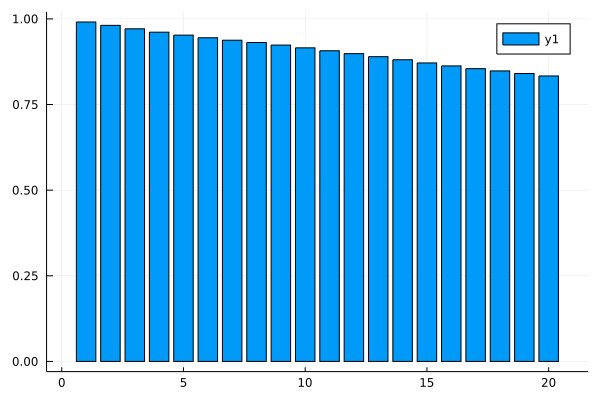

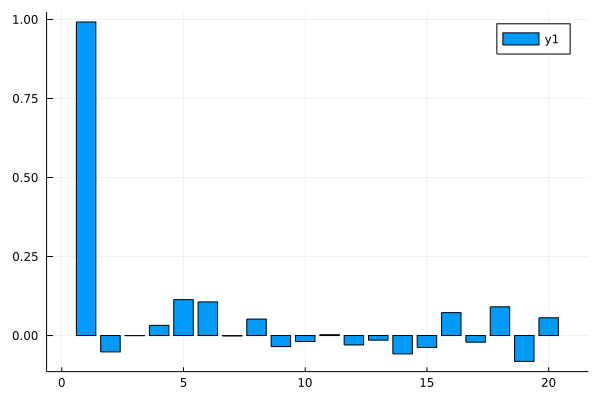

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          0.000352499

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.8719

Details:
    sample size in regression:          498
    number of lags:                     1
    ADF statistic:                      0.726959
    Critical values at 1%, 5%, and 10%: [-2.57023 -1.94155 -1.6163]


In [7]:
testStationary(df1[!,:Close])

In [8]:
Pkg.add("TimeSeries")
using TimeSeries

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [9]:
ta1 = TimeArray(df1;timestamp = :ondate)
ta2 = TimeArray(df2;timestamp = :ondate)
merge(ta1[:Close],ta2[:Close],colnames = [:Close1,:Close2])

500×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-06-24T04:00:00 to 2021-06-16T04:00:00
│                     │ Close1 │ Close2  │
├─────────────────────┼────────┼─────────┤
│ 2019-06-24T04:00:00 │ 133.94 │ 13.58   │
│ 2019-06-25T04:00:00 │ 134.2  │ 13.61   │
│ 2019-06-26T04:00:00 │ 132.97 │ 13.48   │
│ 2019-06-27T04:00:00 │ 132.84 │ 13.48   │
│ 2019-06-28T04:00:00 │ 133.17 │ 13.505  │
│ 2019-07-01T04:00:00 │ 130.6  │ 13.25   │
│ 2019-07-02T04:00:00 │ 133.38 │ 13.53   │
│ 2019-07-03T04:00:00 │ 133.64 │ 13.56   │
│ 2019-07-05T04:00:00 │ 132.16 │ 13.4    │
│ 2019-07-08T04:00:00 │ 131.29 │ 13.32   │
│ 2019-07-09T04:00:00 │ 131.78 │ 13.365  │
│ 2019-07-10T04:00:00 │ 133.82 │ 13.57   │
   ⋮
│ 2021-06-02T04:00:00 │ 178.75 │ 36.37   │
│ 2021-06-03T04:00:00 │ 175.25 │ 35.645  │
│ 2021-06-04T04:00:00 │ 177.17 │ 36.04   │
│ 2021-06-07T04:00:00 │ 177.88 │ 36.185  │
│ 2021-06-08T04:00:00 │ 177.3  │ 36.07   │
│ 2021-06-09T04:00:00 │ 176.97 │ 36.0    │
│ 2021-06-10T04:00:00 │ 177.73 │ 36.1

In [58]:
pct1 = percentchange(ta1[:Close])
pct2 = percentchange(ta2[:Close])
pct = merge(pct1,pct2)
TimeSeries.rename!(pct,:Close => :Close1)
TimeSeries.rename!(pct,:Close_1 => :Close2)
dif = TimeSeries.rename(pct[:Close1] .- pct[:Close2], :Close1_Close2 => :Diff) 
data = merge(pct,dif)
df = DataFrame(data[3:9])
current = DataFrame(data[10])
@show df[3,:Close1]
@show size(current)
current[1,:Close1]

df[3, :Close1] = -0.019298261f0
size(current) = (1, 4)


0.003732477f0

mean(df[!, :Diff]) = -8.239214f-6
std(df[!, :Diff]) = 0.00044683416f0


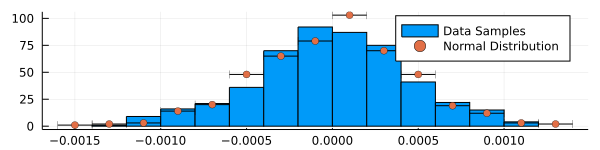

In [59]:
using Random, Distributions
using StatsBase
df = DataFrame(data)

lower = quantile(df[:,:Diff], 0.01)
upper = quantile(df[:,:Diff], 0.99)
df = filter(:Diff => x -> x > lower, df)
df = filter(:Diff => x -> x < upper, df)
@show mean(df[!,:Diff])
@show std(df[!,:Diff])
histogram(df[!,:Diff], labels="Data Samples")
d=fit(Normal, df[!,:Diff])
n = length(df[:,:Diff])
plot!(rand(d, n), seriestype=:scatterhist, linestyle=:solid, size=(600,150),labels="Normal Distribution")


In [60]:
@show mean(rand(d,10000))
@show std(rand(d,10000))

mean(rand(d, 10000)) = -1.997097693063428e-6
std(rand(d, 10000)) = 0.00044621480809555


0.00044621480809555

In [61]:
@show mean(rand(d,10000))
@show std(rand(d,10000))

mean(rand(d, 10000)) = -1.803731131411268e-6
std(rand(d, 10000)) = 0.000452691113469314


0.000452691113469314

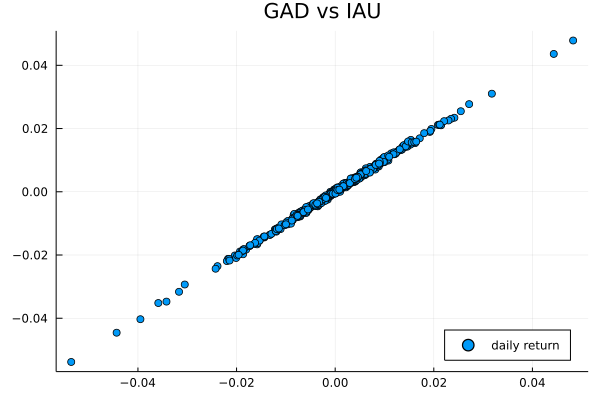

In [64]:
x = df[!,:Close1]
y = df[!,:Close2]
plot(x, y, seriestype = :scatter, title = "GAD vs IAU", label = "daily return",legend=:bottomright)

In [ ]:
df = filter(:Close2 => x -> x > 0.9, df)

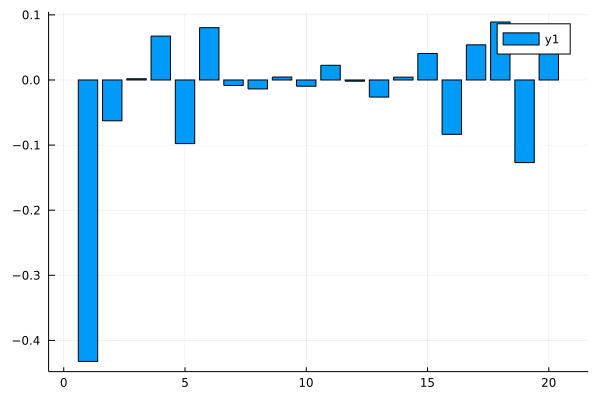

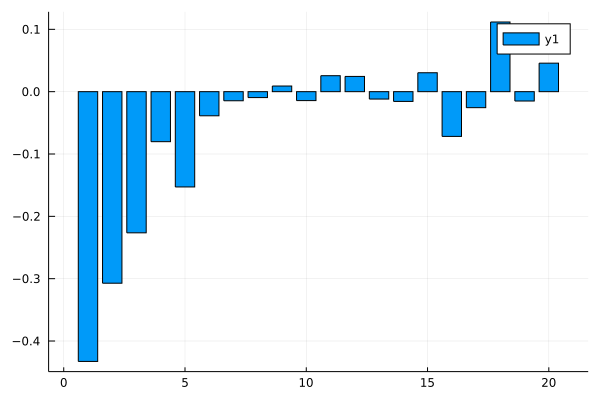

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.87038

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          487
    number of lags:                     1
    ADF statistic:                      -25.5641
    Critical values at 1%, 5%, and 10%: [-2.57033 -1.94156 -1.61629]


In [14]:
testStationary(df[!,:Diff])

In [15]:
# Import Turing and Distributions.
using Turing, Distributions



# Import MCMCChains, Plots, and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# We need a logistic function, which is provided by StatsFuns.
using StatsFuns: logistic

# Functionality for splitting and normalizing the data
using MLDataUtils: rescale!

# Set a seed for reproducibility.
using Random
Random.seed!(0);

In [16]:
# Bayesian logistic regression (LR)
@model linearPair(y0,y1,n) = begin
    u ~ Normal(1,0.1)
    for i = 1:n
        y1[i] ~ Normal( u*y0[i],0.1)
    end
end;

In [17]:

n,_ = size(df)
@show n
train = Matrix(df)


n = 489


489×4 Matrix{Any}:
 2019-06-25T04:00:00   0.00194118    0.002209    -0.000267822
 2019-06-26T04:00:00  -0.00916546   -0.00955187   0.000386403
 2019-06-27T04:00:00  -0.000977515   0.0         -0.000977515
 2019-06-28T04:00:00   0.00248406    0.00185471   0.000629357
 2019-07-01T04:00:00  -0.0192983    -0.018882    -0.000416283
 2019-07-02T04:00:00   0.0212862     0.0211321    0.000154119
 2019-07-03T04:00:00   0.0019493     0.00221736  -0.000268063
 2019-07-05T04:00:00  -0.0110747    -0.0117995    0.000724752
 2019-07-08T04:00:00  -0.00658291   -0.00597023  -0.000612681
 2019-07-09T04:00:00   0.00373248    0.0033786    0.000353875
 2019-07-10T04:00:00   0.0154804     0.0153385    0.000141866
 2019-07-11T04:00:00  -0.00836951   -0.00736917  -0.00100034
 2019-07-12T04:00:00   0.00602863    0.00556797   0.000460658
 ⋮                                                           
 2021-06-01T04:00:00  -0.0021311    -0.00165468  -0.00047641
 2021-06-02T04:00:00   0.00460825    0.00469616  -8.7

In [18]:



# Sample using HMC.
chain = mapreduce(c -> sample(linearPair(train[:,2],train[:,3],n),NUTS(200, 0.65), 1000, discard_adapt=true),
    chainscat,
    1:5
)

describe(chain)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /Users/kahingleung/.julia/packages/Turing/28kgo/src/inference/hmc.jl:188
Sampling: 100%|███████

2-element Vector{ChainDataFrame}:
 Summary Statistics (1 x 8)
 Quantiles (1 x 6)

In [19]:
#plot(chain)

In [20]:
chain

Chains MCMC chain (1000×13×5 Array{Float64, 3}):

Start time        = 2021-06-17T10:59:22.404
Stop time         = 2021-06-17T10:59:34.234
Wall duration     = 11.83 seconds
Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4, 5
Samples per chain = 1000
parameters        = u
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           u    0.9961    0.0976     0.0014    0.0018   2391.7665    1.0012    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

         

In [21]:
lookback = 12
for (row_index,row) in enumerate(eachrow(pct))
    @show row.timestamp
    @show row.Close1
    @show row.Close2
    @show row_index
    if row_index >= lookback
        i = row_index
        @show size(pct[i-lookback+1:i])
        @show pct[i-lookback+1:i]
        @show values(mean(pct[i-lookback+1:i]))
        
    end
    
end

row.timestamp = DateTime("2019-06-25T04:00:00")
row.Close1 = 0.0019411783f0
row.Close2 = 0.0022090003f0
row_index = 1
row.timestamp = DateTime("2019-06-26T04:00:00")
row.Close1 = -0.009165464f0
row.Close2 = -0.009551867f0
row_index = 2
row.timestamp = DateTime("2019-06-27T04:00:00")
row.Close1 = -0.0009775149f0
row.Close2 = 0.0f0
row_index = 3
row.timestamp = DateTime("2019-06-28T04:00:00")
row.Close1 = 0.0024840639f0
row.Close2 = 0.001854707f0
row_index = 4
row.timestamp = DateTime("2019-07-01T04:00:00")
row.Close1 = -0.019298261f0
row.Close2 = -0.018881978f0
row_index = 5
row.timestamp = DateTime("2019-07-02T04:00:00")
row.Close1 = 0.021286238f0
row.Close2 = 0.021132119f0
row_index = 6
row.timestamp = DateTime("2019-07-03T04:00:00")
row.Close1 = 0.0019493004f0
row.Close2 = 0.0022173633f0
row_index = 7
row.timestamp = DateTime("2019-07-05T04:00:00")
row.Close1 = -0.01107475f0
row.Close2 = -0.011799502f0
row_index = 8
row.timestamp = DateTime("2019-07-08T04:00:00")
row.Close1 = -0.0065

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0038353642 0.0038528393]
row.timestamp = DateTime("2019-08-21T04:00:00")
row.Close1 = -0.0032343897f0
row.Close2 = -0.0038126558f0
row_index = 41
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-06T04:00:00 to 2019-08-21T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0023883863 0.0023558792]
row.timestamp = DateTime("2019-08-22T04:00:00")
row.Close1 = -0.0025392664f0
row.Close2 = -0.0020877947f0
row_index = 42
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-07T04:00:00 to 2019-08-22T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0015055662 0.0014961405]
row.timestamp = DateTime("2019-08-23T04:00:00")
row.Close1 = 0.019519031f0
row.Close2 = 0.019874465f0
row_index = 43
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 T

row.Close1 = 0.005328017f0
row.Close2 = 0.005677784f0
row_index = 69
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-16T04:00:00 to 2019-10-01T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.00028083113 -0.00030952157]
row.timestamp = DateTime("2019-10-02T04:00:00")
row.Close1 = 0.011818079f0
row.Close2 = 0.011997092f0
row_index = 70
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-17T04:00:00 to 2019-10-02T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[2.6224801f-5 0.000104618804]
row.timestamp = DateTime("2019-10-03T04:00:00")
row.Close1 = 0.0045301695f0
row.Close2 = 0.004184154f0
row_index = 71
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-18T04:00:00 to 2019-10-03T04:00:00
values(mean(pct[(i - lookback) + 1:

row.Close1 = -0.006436525f0
row.Close2 = -0.0064102304f0
row_index = 97
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-24T04:00:00 to 2019-11-08T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0018662229 -0.0018552234]
row.timestamp = DateTime("2019-11-11T05:00:00")
row.Close1 = -0.0025473519f0
row.Close2 = -0.0028673946f0
row_index = 98
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-25T04:00:00 to 2019-11-11T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0026654403 -0.0026197482]
row.timestamp = DateTime("2019-11-12T05:00:00")
row.Close1 = 0.0029186797f0
row.Close2 = 0.00287564f0
row_index = 99
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-10-28T04:00:00 to 2019-11-12T05:00:00
values(mean(pct[(i - lookback) 

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-16T05:00:00 to 2020-01-02T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0028727073 0.002912267]
row.timestamp = DateTime("2020-01-03T05:00:00")
row.Close1 = 0.013547288f0
row.Close2 = 0.013346982f0
row_index = 134
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-17T05:00:00 to 2020-01-03T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0040196464 0.0039654463]
row.timestamp = DateTime("2020-01-06T05:00:00")
row.Close1 = 0.010487331f0
row.Close2 = 0.010807321f0
row_index = 135
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-12-18T05:00:00 to 2020-01-06T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.004917549 0.004925084]
row.timestamp = DateTime("2020-01-07T05:00:00")
row.Close1 = 0.0040019746f0
r

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-28T05:00:00 to 2020-02-12T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0008030696 -0.0007853333]
row.timestamp = DateTime("2020-02-13T05:00:00")
row.Close1 = 0.0056938487f0
row.Close2 = 0.0056761056f0
row_index = 162
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-29T05:00:00 to 2020-02-13T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00039854288 0.00040416463]
row.timestamp = DateTime("2020-02-14T05:00:00")
row.Close1 = 0.0041111344f0
row.Close2 = 0.0043158415f0
row_index = 163
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-30T05:00:00 to 2020-02-14T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00030101094 0.00037466738]
row.timestamp = DateTime("2020-02-18T05:00:00")
row.Close1 = 0.0

row.timestamp = DateTime("2020-03-25T04:00:00")
row.Close1 = -0.013432546f0
row.Close2 = -0.011575652f0
row_index = 190
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-10T04:00:00 to 2020-03-25T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.003189827 -0.0031485625]
row.timestamp = DateTime("2020-03-26T04:00:00")
row.Close1 = 0.0136811705f0
row.Close2 = 0.012283531f0
row_index = 191
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-11T04:00:00 to 2020-03-26T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.00023938227 -0.0003574181]
row.timestamp = DateTime("2020-03-27T04:00:00")
row.Close1 = -0.0071066804f0
row.Close2 = -0.0063500586f0
row_index = 192
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-12T04:00:00 to 

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-01T04:00:00 to 2020-05-18T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0021285943 0.0021517307]
row.timestamp = DateTime("2020-05-19T04:00:00")
row.Close1 = 0.009711388f0
row.Close2 = 0.009374176f0
row_index = 228
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-04T04:00:00 to 2020-05-19T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0023758651 0.0024159534]
row.timestamp = DateTime("2020-05-20T04:00:00")
row.Close1 = 0.002069227f0
row.Close2 = 0.0017973821f0
row_index = 229
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-05-05T04:00:00 to 2020-05-20T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0022300414 0.0023083433]
row.timestamp = DateTime("2020-05-21T04:00:00")
row.Close1 = -0.014457555

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0015220866 0.0015593987]
row.timestamp = DateTime("2020-06-29T04:00:00")
row.Close1 = 0.00048029033f0
row.Close2 = 0.0005909758f0
row_index = 256
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-06-12T04:00:00 to 2020-06-29T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0021480212 0.0021605184]
row.timestamp = DateTime("2020-06-30T04:00:00")
row.Close1 = 0.0044415593f0
row.Close2 = 0.004134596f0
row_index = 257
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-06-15T04:00:00 to 2020-06-30T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00197426 0.0019545772]
row.timestamp = DateTime("2020-07-01T04:00:00")
row.Close1 = -0.004660679f0
row.Close2 = -0.0041175713f0
row_index = 258
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 T

row.timestamp = DateTime("2020-08-07T04:00:00")
row.Close1 = -0.015733564f0
row.Close2 = -0.016243834f0
row_index = 284
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-23T04:00:00 to 2020-08-07T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.006980508 0.006927273]
row.timestamp = DateTime("2020-08-10T04:00:00")
row.Close1 = -0.003354632f0
row.Close2 = -0.0030958317f0
row_index = 285
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-24T04:00:00 to 2020-08-10T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0059464625 0.005922331]
row.timestamp = DateTime("2020-08-11T04:00:00")
row.Close1 = -0.053533643f0
row.Close2 = -0.053830333f0
row_index = 286
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-27T04:00:00 to 2020-08

size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-09-14T04:00:00 to 2020-09-29T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0018958155 -0.0019050256]
row.timestamp = DateTime("2020-09-30T04:00:00")
row.Close1 = -0.0059484243f0
row.Close2 = -0.006074026f0
row_index = 321
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-09-15T04:00:00 to 2020-09-30T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.003049354 -0.0030404602]
row.timestamp = DateTime("2020-10-01T04:00:00")
row.Close1 = 0.008693116f0
row.Close2 = 0.008888895f0
row_index = 322
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-09-16T04:00:00 to 2020-10-01T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0021481693 -0.0021212555]
row.timestamp = DateTime

size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-22T04:00:00 to 2020-11-06T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0012170858 0.0012384149]
row.timestamp = DateTime("2020-11-09T05:00:00")
row.Close1 = -0.04432118f0
row.Close2 = -0.044575658f0
row_index = 349
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-23T04:00:00 to 2020-11-09T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0016460055 -0.001664001]
row.timestamp = DateTime("2020-11-10T05:00:00")
row.Close1 = 0.003427166f0
row.Close2 = 0.0033726217f0
row_index = 350
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-26T04:00:00 to 2020-11-10T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.001271883 -0.0012862075]
row.timestamp = DateTime("20

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-02T05:00:00 to 2020-12-17T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0031854243 0.0031634634]
row.timestamp = DateTime("2020-12-18T05:00:00")
row.Close1 = -0.001754174f0
row.Close2 = -0.0013921099f0
row_index = 377
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-03T05:00:00 to 2020-12-18T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0024076353 0.0024212315]
row.timestamp = DateTime("2020-12-21T05:00:00")
row.Close1 = -0.0028906923f0
row.Close2 = -0.0030665966f0
row_index = 378
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-12-04T05:00:00 to 2020-12-21T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0015301717 0.0015441626]
row.timestamp = DateTime("2020-12-22T05:00:00")
row.Close1 = -0.007

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-28T05:00:00 to 2021-02-12T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0008419142 -0.0008406387]
row.timestamp = DateTime("2021-02-16T05:00:00")
row.Close1 = -0.014352282f0
row.Close2 = -0.014117022f0
row_index = 415
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-29T05:00:00 to 2021-02-16T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.002115221 -0.0020645557]
row.timestamp = DateTime("2021-02-17T05:00:00")
row.Close1 = -0.011529697f0
row.Close2 = -0.011320872f0
row_index = 416
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-01T05:00:00 to 2021-02-17T05:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.0030904945 -0.0030554403]
row.timestamp = DateTime("2021-02-18T05:00:00")
row.Close1 = 0.0f

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0005158962 0.00051798986]
row.timestamp = DateTime("2021-03-26T04:00:00")
row.Close1 = 0.0028426442f0
row.Close2 = 0.002735535f0
row_index = 443
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-11T05:00:00 to 2021-03-26T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.00032272254 0.0002872274]
row.timestamp = DateTime("2021-03-29T04:00:00")
row.Close1 = -0.01183178f0
row.Close2 = -0.011821885f0
row_index = 444
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-03-12T05:00:00 to 2021-03-29T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[-0.00058592815 -0.00063912064]
row.timestamp = DateTime("2021-03-30T04:00:00")
row.Close1 = -0.017368305f0
row.Close2 = -0.01717782f0
row_index = 445
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12

values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0007246867 0.0007578383]
row.timestamp = DateTime("2021-05-06T04:00:00")
row.Close1 = 0.016436683f0
row.Close2 = 0.015869528f0
row_index = 471
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-21T04:00:00 to 2021-05-06T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0017980468 0.0017345123]
row.timestamp = DateTime("2021-05-07T04:00:00")
row.Close1 = 0.009055842f0
row.Close2 = 0.009074607f0
row_index = 472
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-22T04:00:00 to 2021-05-07T04:00:00
values(mean(pct[(i - lookback) + 1:i])) = Float32[0.0017318219 0.001703652]
row.timestamp = DateTime("2021-05-10T04:00:00")
row.Close1 = 0.003146821f0
row.Close2 = 0.0041839145f0
row_index = 473
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeAr

In [22]:
N = length(pct)
mean1,mean2 = values(mean(pct[1:lookback-1]))
@show mean1
@show mean2
std1,std2 = values(std(pct[1:lookback-1]))
@show std1
@show std2
function betafunc(x1,x2,beta)
    return x1 + beta*x2
end
std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1]
bf12 = betafunc.(pct[1:lookback-1,:Close1] , pct[1:lookback-1,:Close2],-1)
@show bf12
@show std12
currentprice = values(pct[12,:Close1])
@show currentprice
bf12

mean1 = -2.047809f-5
mean2 = -6.6603957f-6
std1 = 0.011592153f0
std2 = 0.011528776f0
bf12 = 11×1 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-06-25T04:00:00 to 2019-07-10T04:00:00
std12 = 0.00053716474f0
currentprice = Float32[-0.008369511]


11×1 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-06-25T04:00:00 to 2019-07-10T04:00:00
│                     │ Close1_Close2 │
├─────────────────────┼───────────────┤
│ 2019-06-25T04:00:00 │ -0.0003       │
│ 2019-06-26T04:00:00 │ 0.0004        │
│ 2019-06-27T04:00:00 │ -0.001        │
│ 2019-06-28T04:00:00 │ 0.0006        │
│ 2019-07-01T04:00:00 │ -0.0004       │
│ 2019-07-02T04:00:00 │ 0.0002        │
│ 2019-07-03T04:00:00 │ -0.0003       │
│ 2019-07-05T04:00:00 │ 0.0007        │
│ 2019-07-08T04:00:00 │ -0.0006       │
│ 2019-07-09T04:00:00 │ 0.0004        │
│ 2019-07-10T04:00:00 │ 0.0001        │

In [23]:
for i in 2:N
    @show values(pct[i-1:i,:Close1])
end

values(pct[i - 1:i, :Close1]) = Float32[0.0019411783; -0.009165464]
values(pct[i - 1:i, :Close1]) = Float32[-0.009165464; -0.0009775149]
values(pct[i - 1:i, :Close1]) = Float32[-0.0009775149; 0.0024840639]
values(pct[i - 1:i, :Close1]) = Float32[0.0024840639; -0.019298261]
values(pct[i - 1:i, :Close1]) = Float32[-0.019298261; 0.021286238]
values(pct[i - 1:i, :Close1]) = Float32[0.021286238; 0.0019493004]
values(pct[i - 1:i, :Close1]) = Float32[0.0019493004; -0.01107475]
values(pct[i - 1:i, :Close1]) = Float32[-0.01107475; -0.006582909]
values(pct[i - 1:i, :Close1]) = Float32[-0.006582909; 0.003732477]
values(pct[i - 1:i, :Close1]) = Float32[0.003732477; 0.015480384]
values(pct[i - 1:i, :Close1]) = Float32[0.015480384; -0.008369511]
values(pct[i - 1:i, :Close1]) = Float32[-0.008369511; 0.0060286317]
values(pct[i - 1:i, :Close1]) = Float32[0.0060286317; 7.4866235f-5]
values(pct[i - 1:i, :Close1]) = Float32[7.4866235f-5; -0.008426251]
values(pct[i - 1:i, :Close1]) = Float32[-0.008426251; 

values(pct[i - 1:i, :Close1]) = Float32[0.0061975047; -0.006694695]
values(pct[i - 1:i, :Close1]) = Float32[-0.006694695; -0.013210006]
values(pct[i - 1:i, :Close1]) = Float32[-0.013210006; 0.0010925535]
values(pct[i - 1:i, :Close1]) = Float32[0.0010925535; 0.0057312544]
values(pct[i - 1:i, :Close1]) = Float32[0.0057312544; 0.0024419988]
values(pct[i - 1:i, :Close1]) = Float32[0.0024419988; 0.0025715458]
values(pct[i - 1:i, :Close1]) = Float32[0.0025715458; -0.0032400931]
values(pct[i - 1:i, :Close1]) = Float32[-0.0032400931; -0.0009479795]
values(pct[i - 1:i, :Close1]) = Float32[-0.0009479795; 0.0056938487]
values(pct[i - 1:i, :Close1]) = Float32[0.0056938487; 0.0041111344]
values(pct[i - 1:i, :Close1]) = Float32[0.0041111344; 0.0127535425]
values(pct[i - 1:i, :Close1]) = Float32[0.0127535425; 0.006230131]
values(pct[i - 1:i, :Close1]) = Float32[0.006230131; 0.0040177736]
values(pct[i - 1:i, :Close1]) = Float32[0.0040177736; 0.014695286]
values(pct[i - 1:i, :Close1]) = Float32[0.01469

values(pct[i - 1:i, :Close1]) = Float32[-0.0019264715; 0.009375861]
values(pct[i - 1:i, :Close1]) = Float32[0.009375861; -0.0032785912]
values(pct[i - 1:i, :Close1]) = Float32[-0.0032785912; 0.0]
values(pct[i - 1:i, :Close1]) = Float32[0.0; 0.00789404]
values(pct[i - 1:i, :Close1]) = Float32[0.00789404; -0.0021211032]
values(pct[i - 1:i, :Close1]) = Float32[-0.0021211032; 0.0026160066]
values(pct[i - 1:i, :Close1]) = Float32[0.0026160066; -0.0053277635]
values(pct[i - 1:i, :Close1]) = Float32[-0.0053277635; 0.0010935082]
values(pct[i - 1:i, :Close1]) = Float32[0.0010935082; -0.020090584]
values(pct[i - 1:i, :Close1]) = Float32[-0.020090584; -0.004791664]
values(pct[i - 1:i, :Close1]) = Float32[-0.004791664; -0.021496952]
values(pct[i - 1:i, :Close1]) = Float32[-0.021496952; 0.0036616444]
values(pct[i - 1:i, :Close1]) = Float32[0.0036616444; -0.0027932185]
values(pct[i - 1:i, :Close1]) = Float32[-0.0027932185; 0.009946371]
values(pct[i - 1:i, :Close1]) = Float32[0.009946371; 0.008659928

values(pct[i - 1:i, :Close1]) = Float32[0.0062905885; -0.0028250767]
values(pct[i - 1:i, :Close1]) = Float32[-0.0028250767; 0.0035563617]
values(pct[i - 1:i, :Close1]) = Float32[0.0035563617; 0.009850542]
values(pct[i - 1:i, :Close1]) = Float32[0.009850542; -0.006423733]
values(pct[i - 1:i, :Close1]) = Float32[-0.006423733; -0.0039508766]
values(pct[i - 1:i, :Close1]) = Float32[-0.0039508766; 0.0027044562]
values(pct[i - 1:i, :Close1]) = Float32[0.0027044562; -0.0025173873]
values(pct[i - 1:i, :Close1]) = Float32[-0.0025173873; 0.0030645502]
values(pct[i - 1:i, :Close1]) = Float32[0.0030645502; -0.0040140436]
values(pct[i - 1:i, :Close1]) = Float32[-0.0040140436; -0.0035485101]
values(pct[i - 1:i, :Close1]) = Float32[-0.0035485101; 0.013098405]
values(pct[i - 1:i, :Close1]) = Float32[0.013098405; -0.007626391]
values(pct[i - 1:i, :Close1]) = Float32[-0.007626391; 0.0045028673]
values(pct[i - 1:i, :Close1]) = Float32[0.0045028673; 0.016436683]
values(pct[i - 1:i, :Close1]) = Float32[0.0

In [24]:

function BuyOrSell(pct)
    lookback,_ = size(pct)
    df = DataFrame(pct[1:lookback-1])
    current = DataFrame(data[lookback])
    
    mean1,mean2 = values(mean(pct[1:lookback-1]))
    @show mean1
    @show mean2
    std1,std2 = values(std(pct[1:lookback-1]))
    @show std1
    @show std2
    mean12 = 0
    std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1] 
    @show std12
    p1 = values(pct[lookback,:Close1])[1]
    p2 = values(pct[lookback,:Close2])[1]
    dif12 = values(pct[lookback,:Close1] .- pct[lookback,:Close2])[1]
    @show p1
    @show p2
    @show dif12

    act1 = 0
    act2 = 0
    thd2 = 2
    thd1 = 1
    
    if p1 >= mean1 + thd2*std1
        act1 = -1
        if p2 >= mean2 + thd2*std2
            act2 = -1
        elseif p2 > mean2 - thd2*std2
                if dif12 > mean12 + thd1*std12
                    act2 = 1
                elseif dif12 < mean12 - thd1*std12
                    act2 = -1
                end    
        else
            act2 = 1
        end
    elseif p1 > mean1 - thd2*std1
        if p2 >= mean2 + thd2*std2
            act2 = -1
            if dif12 > mean12 + thd1*std12
                    act1 = 1
            elseif dif12 < mean12 - thd1*std12
                    act1 = -1
            end  
        elseif p2 > mean2 - thd2*std2
            if dif12 > mean12 + thd1*std12
                    act1 = -1
                    act2 = 1
            elseif dif12 < mean12 - thd1*std12
                    act1 = 1
                    act2 = -1
            end        
        else
            act2 = 1
            if dif12 > mean12 + thd1*std12
                    act1 = -1
            elseif dif12 < mean12 - thd1*std12
                    act1 = 1
            end     
        end
    else
        act1 = 1
        if p2 >= mean2 + thd2*std2
            act2 = -1
        elseif p2 > mean2 - thd2*std2
            if dif12 > mean12 + thd1*std12
                    act2 = 1
            elseif dif12 < mean12 - thd1*std12
                    act2 = -1
            end       
        else
            act2 = 1
        end
    end
    return (act1,act2)
end

BuyOrSell (generic function with 1 method)

In [25]:

function BBand(pct)
    lookback,_ = size(pct)
    df = DataFrame(pct[1:lookback-1])
    current = DataFrame(data[lookback])
    
    mean1,mean2 = values(mean(pct[1:lookback-1]))
    @show mean1
    @show mean2
    std1,std2 = values(std(pct[1:lookback-1]))
    @show std1
    @show std2
    mean12 = 0
    std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1] 
    @show std12
    p1 = values(pct[lookback,:Close1])[1]
    p2 = values(pct[lookback,:Close2])[1]
    dif12 = values(pct[lookback,:Close1] .- pct[lookback,:Close2])[1]
    @show p1
    @show p2
    @show dif12

    act1 = 0
    act2 = 0
    thd2 = 2
    thd1 = 1
    
    if p1 >= mean1 + thd2*std1
        act1 = -1
    elseif p1 <= mean1 - thd2*std1
        act1 = 1
    end
    if p2 >= mean2 + thd2*std2
        act2 = -1
    elseif p2 <= mean2 - thd2*std2
        act2 = 1
    end
    return (act1,act2)
end

BBand (generic function with 1 method)

In [26]:

function MR0(pct)
    lookback,_ = size(pct)
    df = DataFrame(pct[1:lookback-1])
    current = DataFrame(data[lookback])
    

    mean12 = 0
    std12 = values(std(pct[1:lookback-1,:Close1] .- pct[1:lookback-1,:Close2]))[1] 
    @show std12

    dif12 = values(pct[lookback,:Close1] .- pct[lookback,:Close2])[1]

    @show dif12

    act1 = 0
    act2 = 0
    thd1 = 1

    if dif12 > mean12 + thd1*std12
            act1 = -1
            act2 = 1
    elseif dif12 < mean12 - thd1*std12
            act1 = 1
            act2 = -1
    end        
    return (act1,act2)
end

MR0 (generic function with 1 method)

In [27]:
lookback = 12
timestampRows = DateTime[]
signal1 = Float32[]
signal2 = Float32[]
for (row_index,row) in enumerate(eachrow(pct))
    @show row.timestamp
    @show row.Close1
    @show row.Close2
    @show row_index
    if row_index >= lookback
        i = row_index
        @show size(pct[i-lookback+1:i])
        @show pct[i-lookback+1:i]
        buy1,buy2 =  MR0(pct[i-lookback+1:i])
        @show buy1
        @show buy2
        append!(timestampRows, [row.timestamp])
        append!(signal1, [buy1])
        append!(signal2, [buy2])
    end
    
end
resultTab = (datetime = timestampRows,
        Signal1 = signal1, Signal2 = signal2
    )
        
@show resultTab
resultTA = TimeArray(resultTab; timestamp = :datetime, meta = "result")

row.timestamp = DateTime("2019-06-25T04:00:00")
row.Close1 = 0.0019411783f0
row.Close2 = 0.0022090003f0
row_index = 1
row.timestamp = DateTime("2019-06-26T04:00:00")
row.Close1 = -0.009165464f0
row.Close2 = -0.009551867f0
row_index = 2
row.timestamp = DateTime("2019-06-27T04:00:00")
row.Close1 = -0.0009775149f0
row.Close2 = 0.0f0
row_index = 3
row.timestamp = DateTime("2019-06-28T04:00:00")
row.Close1 = 0.0024840639f0
row.Close2 = 0.001854707f0
row_index = 4
row.timestamp = DateTime("2019-07-01T04:00:00")
row.Close1 = -0.019298261f0
row.Close2 = -0.018881978f0
row_index = 5
row.timestamp = DateTime("2019-07-02T04:00:00")
row.Close1 = 0.021286238f0
row.Close2 = 0.021132119f0
row_index = 6
row.timestamp = DateTime("2019-07-03T04:00:00")
row.Close1 = 0.0019493004f0
row.Close2 = 0.0022173633f0
row_index = 7
row.timestamp = DateTime("2019-07-05T04:00:00")
row.Close1 = -0.01107475f0
row.Close2 = -0.011799502f0
row_index = 8
row.timestamp = DateTime("2019-07-08T04:00:00")
row.Close1 = -0.0065

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-06T04:00:00 to 2019-08-21T04:00:00
std12 = 0.0003381927f0
dif12 = 0.0005782661f0
buy1 = -1
buy2 = 1
row.timestamp = DateTime("2019-08-22T04:00:00")
row.Close1 = -0.0025392664f0
row.Close2 = -0.0020877947f0
row_index = 42
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-07T04:00:00 to 2019-08-22T04:00:00
std12 = 0.00037708427f0
dif12 = -0.00045147166f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2019-08-23T04:00:00")
row.Close1 = 0.019519031f0
row.Close2 = 0.019874465f0
row_index = 43
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-08-08T04:00:00 to 2019-08-23T04:00:00
std12 = 0.0003902087f0
dif12 = -0.00035543367f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-08-26T04:00:00")
row.Close1 = 0.00020792261f0
row.Close2 = -0.0003418338f

std12 = 0.00056103524f0
dif12 = -0.0001790123f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-10-03T04:00:00")
row.Close1 = 0.0045301695f0
row.Close2 = 0.004184154f0
row_index = 71
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-18T04:00:00 to 2019-10-03T04:00:00
std12 = 0.00054800045f0
dif12 = 0.00034601567f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-10-04T04:00:00")
row.Close1 = 0.00014067686f0
row.Close2 = 0.0f0
row_index = 72
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-09-19T04:00:00 to 2019-10-04T04:00:00
std12 = 0.0005605624f0
dif12 = 0.00014067686f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-10-07T04:00:00")
row.Close1 = -0.008525065f0
row.Close2 = -0.0083333375f0
row_index = 73
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float3

row.timestamp = DateTime("2019-12-09T05:00:00")
row.Close1 = 0.0f0
row.Close2 = 0.00035793032f0
row_index = 117
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-11-21T05:00:00 to 2019-12-09T05:00:00
std12 = 0.0005396183f0
dif12 = -0.00035793032f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2019-12-10T05:00:00")
row.Close1 = 0.0026891562f0
row.Close2 = 0.002147593f0
row_index = 118
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-11-22T05:00:00 to 2019-12-10T05:00:00
std12 = 0.0005388486f0
dif12 = 0.00054156315f0
buy1 = -1
buy2 = 1
row.timestamp = DateTime("2019-12-11T05:00:00")
row.Close1 = 0.007030769f0
row.Close2 = 0.007857034f0
row_index = 119
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-11-25T05:00:00 to 2019-12-11T05:00:00
std12 = 0.00055798

row.Close1 = 0.00027278805f0
row.Close2 = 0.0003355112f0
row_index = 146
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-06T05:00:00 to 2020-01-22T05:00:00
std12 = 0.0005398696f0
dif12 = -6.272315f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-01-23T05:00:00")
row.Close1 = 0.0023162924f0
row.Close2 = 0.002013562f0
row_index = 147
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-07T05:00:00 to 2020-01-23T05:00:00
std12 = 0.0005316285f0
dif12 = 0.00030273036f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-01-24T05:00:00")
row.Close1 = 0.005846358f0
row.Close2 = 0.006028152f0
row_index = 148
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-01-08T05:00:00 to 2020-01-24T05:00:00
std12 = 0.00052668987f0
dif12 = -0.00018179417f0
buy1 = 0
buy2

row.Close2 = 0.047843844f0
row_index = 189
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-09T04:00:00 to 2020-03-24T04:00:00
std12 = 0.0006077154f0
dif12 = 0.00041354448f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-03-25T04:00:00")
row.Close1 = -0.013432546f0
row.Close2 = -0.011575652f0
row_index = 190
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-10T04:00:00 to 2020-03-25T04:00:00
std12 = 0.0006126422f0
dif12 = -0.0018568933f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2020-03-26T04:00:00")
row.Close1 = 0.0136811705f0
row.Close2 = 0.012283531f0
row_index = 191
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-03-11T04:00:00 to 2020-03-26T04:00:00
std12 = 0.0008429556f0
dif12 = 0.0013976395f0
buy1 = -1
buy2 = 1
row.timestamp = DateT

row_index = 218
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-04-20T04:00:00 to 2020-05-05T04:00:00
std12 = 0.00066162116f0
dif12 = 0.00024770224f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-05-06T04:00:00")
row.Close1 = -0.012238338f0
row.Close2 = -0.011941091f0
row_index = 219
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-04-21T04:00:00 to 2020-05-06T04:00:00
std12 = 0.00041464783f0
dif12 = -0.0002972465f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-05-07T04:00:00")
row.Close1 = 0.015345781f0
row.Close2 = 0.016423838f0
row_index = 220
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-04-22T04:00:00 to 2020-05-07T04:00:00
std12 = 0.00043278097f0
dif12 = -0.0010780571f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2020-05-08T04:00:00"

row.timestamp = DateTime("2020-07-07T04:00:00")
row.Close1 = 0.0060722865f0
row.Close2 = 0.0067448565f0
row_index = 261
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-06-19T04:00:00 to 2020-07-07T04:00:00
std12 = 0.00051475654f0
dif12 = -0.00067256996f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2020-07-08T04:00:00")
row.Close1 = 0.0063318554f0
row.Close2 = 0.0066997325f0
row_index = 262
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-06-22T04:00:00 to 2020-07-08T04:00:00
std12 = 0.00050041603f0
dif12 = -0.00036787707f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-07-09T04:00:00")
row.Close1 = -0.0027637368f0
row.Close2 = -0.002893545f0
row_index = 263
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-06-23T04:00:00 to 2020-07-09T04:00:00
std

row.Close1 = 0.021474719f0
row.Close2 = 0.021024274f0
row_index = 290
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-07-31T04:00:00 to 2020-08-17T04:00:00
std12 = 0.00048352123f0
dif12 = 0.00045044534f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-08-18T04:00:00")
row.Close1 = 0.009385487f0
row.Close2 = 0.009767721f0
row_index = 291
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-03T04:00:00 to 2020-08-18T04:00:00
std12 = 0.00042423652f0
dif12 = -0.00038223434f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-08-19T04:00:00")
row.Close1 = -0.031666648f0
row.Close2 = -0.031634096f0
row_index = 292
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-08-04T04:00:00 to 2020-08-19T04:00:00
std12 = 0.0004074874f0
dif12 = -3.2551587f-5
buy1 = 0
buy2

row.Close2 = -0.00412327f0
row_index = 333
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-01T04:00:00 to 2020-10-16T04:00:00
std12 = 0.00043957736f0
dif12 = 0.00054672686f0
buy1 = -1
buy2 = 1
row.timestamp = DateTime("2020-10-19T04:00:00")
row.Close1 = 0.00044880444f0
row.Close2 = 0.0013802031f0
row_index = 334
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-02T04:00:00 to 2020-10-19T04:00:00
std12 = 0.00046946548f0
dif12 = -0.0009313986f0
buy1 = 1
buy2 = -1
row.timestamp = DateTime("2020-10-20T04:00:00")
row.Close1 = 0.004877024f0
row.Close2 = 0.004134596f0
row_index = 335
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-10-05T04:00:00 to 2020-10-20T04:00:00
std12 = 0.00054767285f0
dif12 = 0.000742428f0
buy1 = -1
buy2 = 1
row.timestamp = Da

row.Close2 = -0.01044691f0
row_index = 362
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-11-11T05:00:00 to 2020-11-27T05:00:00
std12 = 0.00044197086f0
dif12 = 0.00018215366f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-11-30T05:00:00")
row.Close1 = -0.0064734784f0
row.Close2 = -0.0064514484f0
row_index = 363
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-11-12T05:00:00 to 2020-11-30T05:00:00
std12 = 0.00043808605f0
dif12 = -2.202997f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2020-12-01T05:00:00")
row.Close1 = 0.021094384f0
row.Close2 = 0.021251176f0
row_index = 364
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2020-11-13T05:00:00 to 2020-12-01T05:00:00
std12 = 0.00043253935f0
dif12 = -0.00015679188f0
buy1 = 0
buy2 = 0
row.timestamp = Date

size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-12T05:00:00 to 2021-01-28T05:00:00
std12 = 0.0004262051f0
dif12 = 0.00035741838f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-01-29T05:00:00")
row.Close1 = 0.00017358379f0
row.Close2 = 0.0005697442f0
row_index = 404
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-13T05:00:00 to 2021-01-29T05:00:00
std12 = 0.00041184147f0
dif12 = -0.0003961604f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-02-01T05:00:00")
row.Close1 = 0.008800381f0
row.Close2 = 0.008542098f0
row_index = 405
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-01-14T05:00:00 to 2021-02-01T05:00:00
std12 = 0.00042884547f0
dif12 = 0.00025828276f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-02-02T05:00:00")
row.Close1 = -0

pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-24T05:00:00 to 2021-03-11T05:00:00
std12 = 0.00051763305f0
dif12 = -0.00022226281f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-03-12T05:00:00")
row.Close1 = -0.0001859492f0
row.Close2 = -0.00020692592f0
row_index = 433
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-25T05:00:00 to 2021-03-12T05:00:00
std12 = 0.0005167649f0
dif12 = 2.0976717f-5
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-03-15T04:00:00")
row.Close1 = 0.004458802f0
row.Close2 = 0.0045663347f0
row_index = 434
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-02-26T05:00:00 to 2021-03-15T04:00:00
std12 = 0.0005167942f0
dif12 = -0.00010753283f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-03-16T04:00:00")
row.Close1 = 0.0009865856f0
row.Close2 = 0.0f0
row_index

buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-04-29T04:00:00")
row.Close1 = -0.0040140436f0
row.Close2 = -0.0041225576f0
row_index = 466
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-14T04:00:00 to 2021-04-29T04:00:00
std12 = 0.0004163221f0
dif12 = 0.00010851398f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-04-30T04:00:00")
row.Close1 = -0.0035485101f0
row.Close2 = -0.0039088423f0
row_index = 467
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-15T04:00:00 to 2021-04-30T04:00:00
std12 = 0.000344909f0
dif12 = 0.0003603322f0
buy1 = -1
buy2 = 1
row.timestamp = DateTime("2021-05-03T04:00:00")
row.Close1 = 0.013098405f0
row.Close2 = 0.013423089f0
row_index = 468
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-04-16T04:00:00 to 2021-05-03

row.timestamp = DateTime("2021-06-10T04:00:00")
row.Close1 = 0.0042945305f0
row.Close2 = 0.004444433f0
row_index = 495
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-05-25T04:00:00 to 2021-06-10T04:00:00
std12 = 0.00021430009f0
dif12 = -0.00014990242f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-06-11T04:00:00")
row.Close1 = -0.011421755f0
row.Close2 = -0.011615006f0
row_index = 496
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-05-26T04:00:00 to 2021-06-11T04:00:00
std12 = 0.00021901008f0
dif12 = 0.0001932513f0
buy1 = 0
buy2 = 0
row.timestamp = DateTime("2021-06-14T04:00:00")
row.Close1 = -0.0055207834f0
row.Close2 = -0.005595942f0
row_index = 497
size(pct[(i - lookback) + 1:i]) = (12, 2)
pct[(i - lookback) + 1:i] = 12×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2021-05-27T04:00:00 to 2021-06-14T04:00:00
std12 =

resultTab = (datetime = [DateTime("2019-07-11T04:00:00"), DateTime("2019-07-12T04:00:00"), DateTime("2019-07-15T04:00:00"), DateTime("2019-07-16T04:00:00"), DateTime("2019-07-17T04:00:00"), DateTime("2019-07-18T04:00:00"), DateTime("2019-07-19T04:00:00"), DateTime("2019-07-22T04:00:00"), DateTime("2019-07-23T04:00:00"), DateTime("2019-07-24T04:00:00"), DateTime("2019-07-25T04:00:00"), DateTime("2019-07-26T04:00:00"), DateTime("2019-07-29T04:00:00"), DateTime("2019-07-30T04:00:00"), DateTime("2019-07-31T04:00:00"), DateTime("2019-08-01T04:00:00"), DateTime("2019-08-02T04:00:00"), DateTime("2019-08-05T04:00:00"), DateTime("2019-08-06T04:00:00"), DateTime("2019-08-07T04:00:00"), DateTime("2019-08-08T04:00:00"), DateTime("2019-08-09T04:00:00"), DateTime("2019-08-12T04:00:00"), DateTime("2019-08-13T04:00:00"), DateTime("2019-08-14T04:00:00"), DateTime("2019-08-15T04:00:00"), DateTime("2019-08-16T04:00:00"), DateTime("2019-08-19T04:00:00"), DateTime("2019-08-20T04:00:00"), DateTime("2019-08-

488×2 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-07-11T04:00:00 to 2021-06-16T04:00:00
│                     │ Signal1 │ Signal2 │
├─────────────────────┼─────────┼─────────┤
│ 2019-07-11T04:00:00 │ 1.0     │ -1.0    │
│ 2019-07-12T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-15T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-16T04:00:00 │ 1.0     │ -1.0    │
│ 2019-07-17T04:00:00 │ -1.0    │ 1.0     │
│ 2019-07-18T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-19T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-22T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-23T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-24T04:00:00 │ 0.0     │ 0.0     │
│ 2019-07-25T04:00:00 │ 1.0     │ -1.0    │
│ 2019-07-26T04:00:00 │ 0.0     │ 0.0     │
   ⋮
│ 2021-06-02T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-03T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-04T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-07T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-08T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-09T04:00:00 │ 0.0     │ 0.0     │
│ 2021-06-10T04:0

In [28]:
prices = merge(ta1[:Close],ta2[:Close],colnames = [:Close1,:Close2])
PL = merge(prices,resultTA,colnames = [:Close1,:Close2,:Signal1,:Signal2])

488×4 TimeArray{Float32, 2, DateTime, Matrix{Float32}} 2019-07-11T04:00:00 to 2021-06-16T04:00:00
│                     │ Close1  │ Close2  │ Signal1 │ Signal2 │
├─────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ 2019-07-11T04:00:00 │ 132.7   │ 13.47   │ 1.0     │ -1.0    │
│ 2019-07-12T04:00:00 │ 133.5   │ 13.545  │ 0.0     │ 0.0     │
│ 2019-07-15T04:00:00 │ 133.51  │ 13.54   │ 0.0     │ 0.0     │
│ 2019-07-16T04:00:00 │ 132.385 │ 13.44   │ 1.0     │ -1.0    │
│ 2019-07-17T04:00:00 │ 134.59  │ 13.645  │ -1.0    │ 1.0     │
│ 2019-07-18T04:00:00 │ 136.43  │ 13.84   │ 0.0     │ 0.0     │
│ 2019-07-19T04:00:00 │ 134.47  │ 13.64   │ 0.0     │ 0.0     │
│ 2019-07-22T04:00:00 │ 134.46  │ 13.64   │ 0.0     │ 0.0     │
│ 2019-07-23T04:00:00 │ 133.69  │ 13.555  │ 0.0     │ 0.0     │
│ 2019-07-24T04:00:00 │ 134.37  │ 13.62   │ 0.0     │ 0.0     │
│ 2019-07-25T04:00:00 │ 133.38  │ 13.53   │ 1.0     │ -1.0    │
│ 2019-07-26T04:00:00 │ 133.63  │ 13.555  │ 0.0     │ 0.0     │
   ⋮
│

In [29]:
position = [0,0]
balance = [0.0,0.0]
N ,_ = size(PL)
PL1 = zeros(N)
PL2 = zeros(N)
for (row_index,row) in enumerate(eachrow(PL))
    if position[1] == 0 && row.Signal1 == 1 && row_index < N
        position[1] = 1
        balance[1] = balance[1] - row.Close1
        
    elseif position[1] == 1 && row.Signal1 == -1
        position[1] = 0
        balance[1] = balance[1] + row.Close1
        PL1[row_index] = balance[1]
    end
    
    if position[2] == 0 && row.Signal2 == 1 && row_index < N
        position[2] = 1
        balance[2] = balance[2] - 10 * row.Close2
    elseif position[2] == 1 && row.Signal2 == -1
        position[2] = 0
        balance[2] = balance[2] + 10*row.Close2
        PL2[row_index] = balance[2]
    end
    if row_index == N
        if position[1] == 1 
            position[1] = 0
            balance[1] = balance[1] + row.Close1
            PL1[row_index] = balance[1]
        end
        if position[2] == 1 
            position[2] = 0
            balance[2] = balance[2] + 10*row.Close2
            PL2[row_index] = balance[2]
        end
    end
end
    
@show balance
@show position

balance = [25.611572265625, 19.322952270507812]
position = [0, 0]


2-element Vector{Int64}:
 0
 0

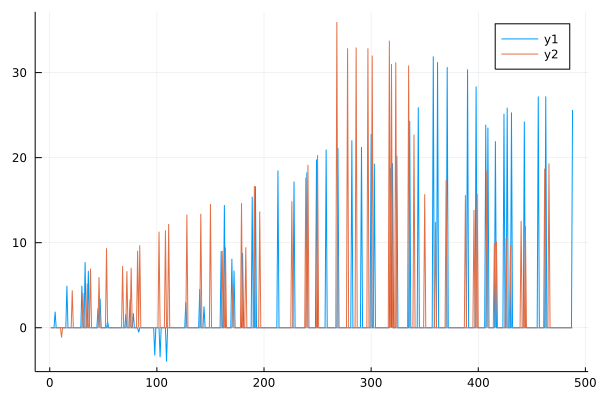

In [30]:
plot(PL1)
plot!(PL2)

In [31]:
gain1 = count(y->y>0,PL1)
loss1 = count(y->y<0,PL1)
gain2 = count(y->y>0,PL2)
loss2 = count(y->y<0,PL2)
@show gain1,loss1,gain2,loss2

(gain1, loss1, gain2, loss2) = (51, 4, 53, 1)


(51, 4, 53, 1)

In [32]:
function computeScore(PL)
    profit = count(y->y>0,PL)
    loss = count(y->y<0,PL)
    return profit / (profit+loss)
end
@show computeScore(PL1)
@show computeScore(PL2)

computeScore(PL1) = 0.9272727272727272
computeScore(PL2) = 0.9814814814814815


0.9814814814814815

In [33]:
n = length(PL1)

488

In [34]:
function accumulatePlot(PL)
    N = length(PL)
    acc = zeros(N)
    for i in 1:N
        if i == 1
            acc[i] = PL[i]
        else
            acc[i] = acc[i-1]+PL[i]
        end
    end
    return acc
end


accumulatePlot (generic function with 1 method)

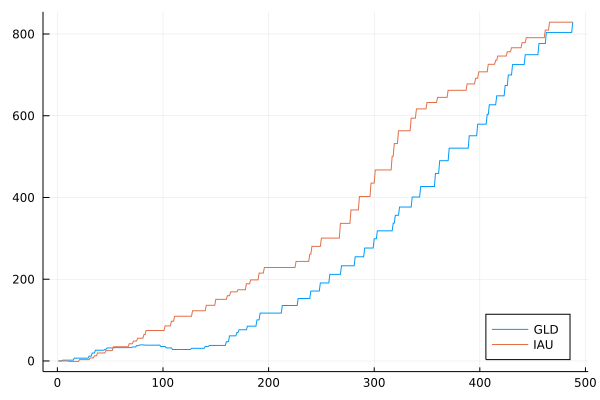

In [35]:
plot(accumulatePlot(PL1),label = tick1,legend=:bottomright)
plot!(accumulatePlot(PL2),label = tick2,legend=:bottomright)

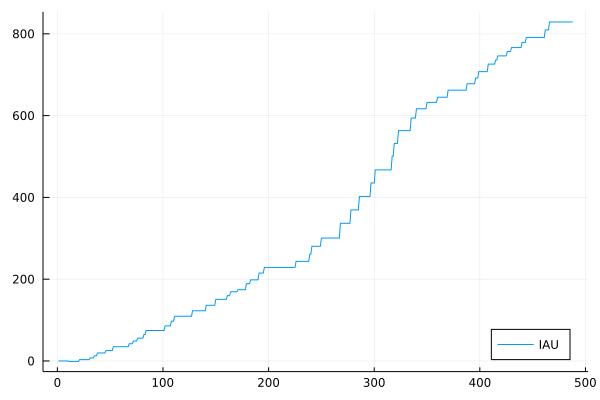

In [36]:
plot(accumulatePlot(PL2),label = tick2,legend=:bottomright)